In [24]:
import pandas as pd 

In [25]:
# Get list of all CSV files in the dipd2 directory
import os
import pandas as pd
from pathlib import Path

# Define the directory path using relative path from notebook location
notebook_dir = Path().absolute()
project_root = notebook_dir.parent.parent
dipd2_dir = project_root / "data" / "interim" / "rexp_final"

# Get all CSV files in the directory and print count
csv_files = list(dipd2_dir.glob("*.csv"))
print(f"Number of CSV files found: {len(csv_files)}")

# Read and concatenate all CSV files
dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined dataframe
print("Combined dataframe shape:", combined_df.shape)
combined_df


Number of CSV files found: 1
Combined dataframe shape: (16, 10)


,period_end_date,year,month,Revenue,Cost_of_Sales,Gross_Profit,Distribution_Costs,Administrative_Expenses,Profit_from_Operations,Profit_for_the_Period
0,2024-12-31,2024,12,1941892,1607594,334298,286275,80581,-26507,-53988
1,2024-09-30,2024,9,2139733,1707131,432602,351682,88697,40140,-53830
2,2024-03-31,2024,3,1682540,1439393,243147,193767,80255,-25349,14640
3,2024-03-31,2024,3,1486128,1123186,362942,154991,77853,135080,-69640
4,2023-12-31,2023,12,2089873,1670217,419656,239643,104539,87501,70768
5,2023-09-30,2023,9,2069984,1661929,408055,202073,103343,113159,175852
6,2023-06-30,2023,6,1474458,1275967,198491,162533,88727,-44991,-142922
7,2023-03-31,2023,3,1702720,1234766,467954,304953,122348,19939,-247433
8,2022-12-31,2022,12,1909048,1487153,421895,308958,108560,11502,52543
9,2022-09-30,2022,9,2661097,1979877,681220,353007,116536,217655,250220


In [26]:
# Sort the combined dataframe by period_end_date
combined_df['period_end_date'] = pd.to_datetime(combined_df['period_end_date'])
combined_df = combined_df.sort_values('period_end_date')
combined_df


,period_end_date,year,month,Revenue,Cost_of_Sales,Gross_Profit,Distribution_Costs,Administrative_Expenses,Profit_from_Operations,Profit_for_the_Period
15,2021-03-31,2021,3,1344850,921087,423763,110574,54818,267524,294833
14,2021-06-30,2021,6,1400300,955738,444562,180649,59170,210215,199429
13,2021-09-30,2021,9,1754079,1155680,598399,248786,76198,279132,243320
12,2021-12-31,2021,12,1778416,1202429,575987,299925,76958,205982,181879
11,2022-03-31,2022,3,6536932,4351826,2185106,1043144,309702,864516,1657892
10,2022-06-30,2022,6,6536932,4351826,2185106,1043144,309702,864516,1657892
9,2022-09-30,2022,9,2661097,1979877,681220,353007,116536,217655,250220
8,2022-12-31,2022,12,1909048,1487153,421895,308958,108560,11502,52543
7,2023-03-31,2023,3,1702720,1234766,467954,304953,122348,19939,-247433
6,2023-06-30,2023,6,1474458,1275967,198491,162533,88727,-44991,-142922


In [27]:
# Remove duplicate rows based on all columns
combined_df = combined_df.drop_duplicates()

# Reset the index after removing duplicates
combined_df = combined_df.reset_index(drop=True)

# Display the deduplicated dataframe
print("Shape after removing duplicates:", combined_df.shape)
combined_df


Shape after removing duplicates: (16, 10)


,period_end_date,year,month,Revenue,Cost_of_Sales,Gross_Profit,Distribution_Costs,Administrative_Expenses,Profit_from_Operations,Profit_for_the_Period
0,2021-03-31,2021,3,1344850,921087,423763,110574,54818,267524,294833
1,2021-06-30,2021,6,1400300,955738,444562,180649,59170,210215,199429
2,2021-09-30,2021,9,1754079,1155680,598399,248786,76198,279132,243320
3,2021-12-31,2021,12,1778416,1202429,575987,299925,76958,205982,181879
4,2022-03-31,2022,3,6536932,4351826,2185106,1043144,309702,864516,1657892
5,2022-06-30,2022,6,6536932,4351826,2185106,1043144,309702,864516,1657892
6,2022-09-30,2022,9,2661097,1979877,681220,353007,116536,217655,250220
7,2022-12-31,2022,12,1909048,1487153,421895,308958,108560,11502,52543
8,2023-03-31,2023,3,1702720,1234766,467954,304953,122348,19939,-247433
9,2023-06-30,2023,6,1474458,1275967,198491,162533,88727,-44991,-142922


In [28]:
df = combined_df

# Rename columns to match expected names
df.columns = df.columns.str.lower()

# Compute Operating Expenses
# Check if columns exist before calculating
if 'distribution_costs' in df.columns and 'administrative_expenses' in df.columns:
    df["operating_expenses"] = df["distribution_costs"] + df["administrative_expenses"]
else:
    # If columns don't exist, set operating expenses to 0
    df["operating_expenses"] = 0
    print("Warning: distribution_costs and/or administrative_expenses columns not found")

# Compute Operating Income
df["operating_income"] = df["gross_profit"] - df["operating_expenses"]

# Rename cost_of_sales to COGS if it exists
if 'cost_of_sales' in df.columns:
    df.rename(columns={"cost_of_sales": "COGS"}, inplace=True)

# Display result with error handling for column names
display_cols = ["period_end_date"]
for col in ["revenue", "COGS", "gross_profit", "operating_expenses", "operating_income", "profit_for_the_period"]:
    if col in df.columns:
        display_cols.append(col)
    else:
        print(f"Warning: {col} column not found")

print(df[display_cols])

   period_end_date  revenue     COGS  gross_profit  operating_expenses  \
0       2021-03-31  1344850   921087        423763              165392   
1       2021-06-30  1400300   955738        444562              239819   
2       2021-09-30  1754079  1155680        598399              324984   
3       2021-12-31  1778416  1202429        575987              376883   
4       2022-03-31  6536932  4351826       2185106             1352846   
5       2022-06-30  6536932  4351826       2185106             1352846   
6       2022-09-30  2661097  1979877        681220              469543   
7       2022-12-31  1909048  1487153        421895              417518   
8       2023-03-31  1702720  1234766        467954              427301   
9       2023-06-30  1474458  1275967        198491              251260   
10      2023-09-30  2069984  1661929        408055              305416   
11      2023-12-31  2089873  1670217        419656              344182   
12      2024-03-31  1682540  1439393  

In [29]:
# Create the output directory if it doesn't exist
import os
project_root = notebook_dir.parent.parent
project_root
output_dir = os.path.join(project_root, "data", "processed", "quarterly", "rexp")
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame to CSV
output_path = os.path.join(output_dir, "rexp_quarterly.csv")
df.to_csv(output_path, index=False)
print(f"Data saved to: {output_path}")


Data saved to: c:\Users\muzny\Desktop\Finalacial data project\muzny aws\Submission_Git\Financial_Analysis\data\processed\quarterly\rexp\rexp_quarterly.csv


In [30]:
# Aggregate data yearly
annual_report = df.groupby("year").sum(numeric_only=True)
annual_report.reset_index(inplace=True)

# Rename columns for clarity
annual_report.rename(columns={"profit_for_the_period": "net_income"}, inplace=True)

# Create output directory for annual data if it doesn't exist
output_dir = os.path.join(project_root, "data", "processed", "annual", "rexp")
os.makedirs(output_dir, exist_ok=True)

# Save annual report to CSV
output_path = os.path.join(output_dir, "rexp_annual.csv")
annual_report.to_csv(output_path, index=False)
print(f"Annual data saved to: {output_path}")

# Display the final report
print("\n=== Annual Financial Report ===\n")
print(annual_report)

Annual data saved to: c:\Users\muzny\Desktop\Finalacial data project\muzny aws\Submission_Git\Financial_Analysis\data\processed\annual\rexp\rexp_annual.csv

=== Annual Financial Report ===

   year  month   revenue      COGS  gross_profit  distribution_costs  \
0  2021     30   6277645   4234934       2042711              839934   
1  2022     30  17644009  12170682       5473327             2748253   
2  2023     30   7337035   5842879       1494156              909202   
3  2024     27   7250293   5877304       1372989              986715   

   administrative_expenses  profit_from_operations  net_income  \
0                   267144                  962853      919461   
1                   844500                 1958189     3618547   
2                   418957                  175608     -143735   
3                   327386                  123364     -162818   

   operating_expenses  operating_income  
0             1107078            935633  
1             3592753           18

### visualizations

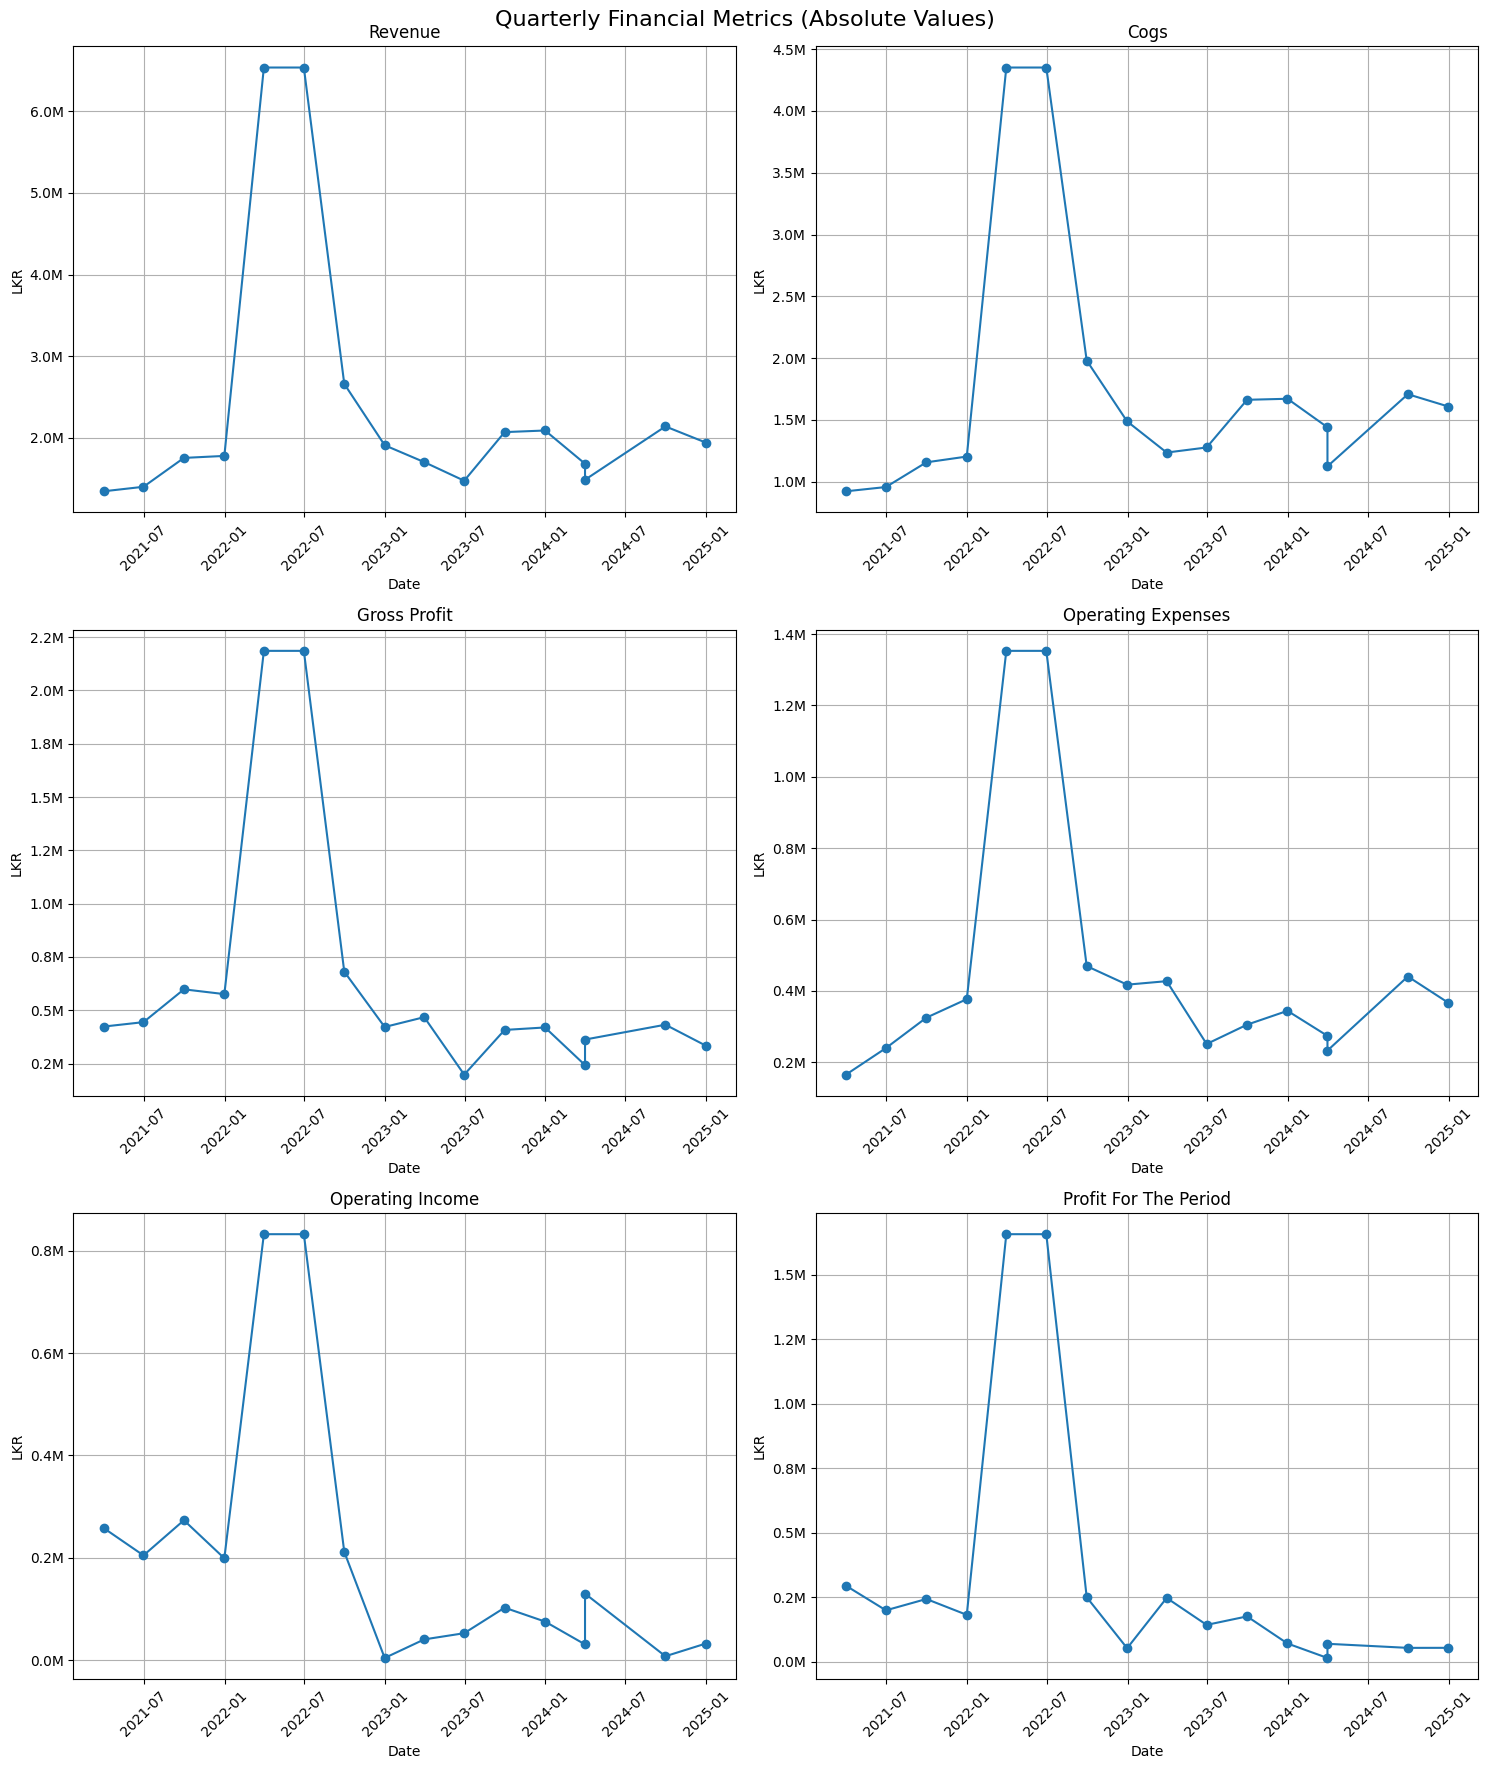

In [31]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create separate plots for each financial metric
metrics = ['revenue', 'COGS', 'gross_profit', 'operating_expenses', 'operating_income', 'profit_for_the_period']
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Quarterly Financial Metrics (Absolute Values)', fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    # Take absolute values
    values = df[metric].abs()
    
    # Create the subplot
    axes[idx].plot(df['period_end_date'], values, marker='o')
    
    # Customize each subplot
    axes[idx].set_title(metric.replace('_', ' ').title())
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('LKR')
    axes[idx].grid(True)
    
    # Format y-axis labels to show values in millions
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))
    
    # Rotate x-axis labels
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


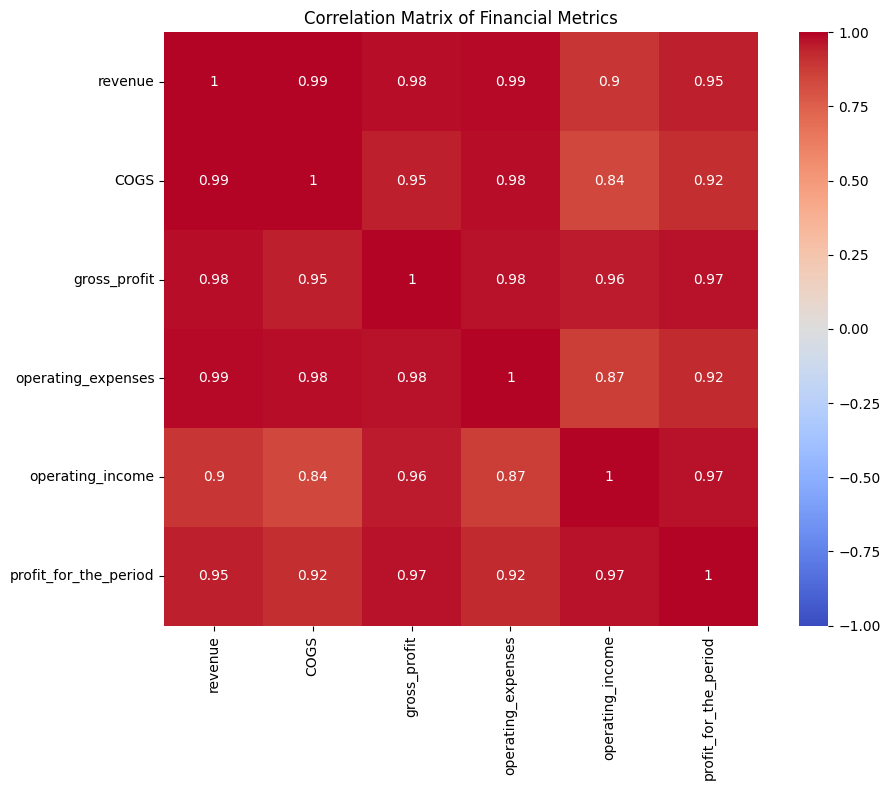

In [32]:
# Import seaborn
import seaborn as sns

# Create a correlation matrix for the financial metrics
correlation_matrix = df[metrics].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            vmin=-1, vmax=1,  # Set value range for correlations
            center=0,  # Center the colormap at 0
            square=True)  # Make cells square

plt.title('Correlation Matrix of Financial Metrics')
plt.tight_layout()
plt.show()


In [33]:
# Calculate key statistics for each financial metric
statistics = df[metrics].agg(['mean', 'median', 'std']).round(2)

# Create a DataFrame with statistics
stats_df = pd.DataFrame(statistics)

# Rename the index for better display
stats_df.index = ['Mean', 'Median', 'Standard Deviation']

# Format the column names to be more readable
stats_df.columns = [col.replace('_', ' ').title() for col in stats_df.columns]

# Display the formatted DataFrame
display(stats_df)


,Revenue,Cogs,Gross Profit,Operating Expenses,Operating Income,Profit For The Period
Mean,2406811.38,1757862.44,648948.94,458880.69,190068.25,264465.94
Median,1843732.00,1463273.00,428182.50,355519.00,116368.50,123310.00
Standard Deviation,1645774.95,1053461.72,611614.07,359057.57,272624.98,565151.79


In [34]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Sample DataFrame (Replace with actual data)


# Feature Engineering
def create_features(df):
    features = []
    target = []
    
    for i in range(len(df)-1):
        features.append([
            df.iloc[i]['revenue'],
            df.iloc[i]['COGS'],
            df.iloc[i]['gross_profit'],
            df.iloc[i]['operating_expenses'],
            df.iloc[i]['operating_income']
        ])
        target.append(df.iloc[i+1]['profit_for_the_period'])
        
    return np.array(features), np.array(target)

X, y = create_features(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection
def objective(trial):
    model_name = trial.suggest_categorical("model", ["LinearRegression", "Ridge", "Lasso", "RandomForest", "XGBoost"])
    
    if model_name == "LinearRegression":
        model = LinearRegression(
            fit_intercept=trial.suggest_categorical('fit_intercept', [True, False]),
            positive=trial.suggest_categorical('positive', [True, False])
        )
    elif model_name == "Ridge":
        model = Ridge(alpha=trial.suggest_loguniform('alpha', 0.01, 10))
    elif model_name == "Lasso":
        model = Lasso(alpha=trial.suggest_loguniform('alpha', 0.01, 10))
    elif model_name == "RandomForest":
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int('n_estimators', 50, 200),
            max_depth=trial.suggest_int('max_depth', 3, 15),
            random_state=42
        )
    else:
        model = XGBRegressor(
            n_estimators=trial.suggest_int('n_estimators', 50, 200),
            max_depth=trial.suggest_int('max_depth', 3, 15),
            learning_rate=trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            random_state=42
        )
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return np.sqrt(mean_squared_error(y_test, y_pred))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print(f"Best Model: {best_params['model']}")
print(f"Best Parameters: {best_params}")

# Train final model
if best_params['model'] == "LinearRegression":
    final_model = LinearRegression(fit_intercept=best_params['fit_intercept'], positive=best_params['positive'])
elif best_params['model'] == "Ridge":
    final_model = Ridge(alpha=best_params['alpha'])
elif best_params['model'] == "Lasso":
    final_model = Lasso(alpha=best_params['alpha'])
elif best_params['model'] == "RandomForest":
    final_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
else:
    final_model = XGBRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], random_state=42)

final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_test_scaled)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final RMSE: {final_rmse:,.2f}")

# Sample inference
sample_input = np.array([[1000, 500, 300, 200, 150]])  # Replace with real data
sample_input_scaled = scaler.transform(sample_input)
predicted_profit = final_model.predict(sample_input_scaled)
print(f"Predicted Profit for the next quarter: {predicted_profit[0]:,.2f}")


c:\Users\muzny\anaconda3\envs\genAI\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-27 07:14:29,893] A new study created in memory with name: no-name-c0f69e62-8f8f-4cf9-a4fc-4f3e47714370
C:\Users\muzny\AppData\Local\Temp\ipykernel_20868\2110500727.py:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  model = Lasso(alpha=trial.suggest_loguniform('alpha', 0.01, 10))
c:\Users\muzny\anaconda3\envs\genAI\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap:

Best Model: XGBoost
Best Parameters: {'model': 'XGBoost', 'n_estimators': 151, 'max_depth': 10, 'learning_rate': 0.01390571477148408}
Final RMSE: 34,976.91
Predicted Profit for the next quarter: 175,693.16


In [36]:
# Save the trained model and scaler
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model
model_path = os.path.join('models', 'rexp_model.joblib')
joblib.dump(final_model, model_path)

# Save the scaler
scaler_path = os.path.join('models', 'rexp_scaler.joblib') 
joblib.dump(scaler, scaler_path)

print(f"Model saved to {model_path}")
print(f"Scaler saved to {scaler_path}")


Model saved to models\rexp_model.joblib
Scaler saved to models\rexp_scaler.joblib


In [42]:
# Load the saved model and scaler
loaded_model = joblib.load('models/rexp_model.joblib')
loaded_scaler = joblib.load('models/rexp_scaler.joblib')

# Make a sample prediction using loaded model
sample_input = np.array([[100000, 5000, 30000, 200000, 1500]])  # Sample data
sample_input_scaled = loaded_scaler.transform(sample_input)
predicted_profit = loaded_model.predict(sample_input_scaled)

print(f"Predicted Profit using loaded model: {predicted_profit[0]:,.2f}")


Predicted Profit using loaded model: 175,693.16
